In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv(r"C:\Users\Yash\Downloads\archive (4)\spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


Data Cleaning

In [6]:
df.shape

(5572, 5)

In [8]:
#derop columns v1,v2
df = df[["v1","v2"]]

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#Reaname the colum
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_11660\1442225509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"v1":"target","v2":"text"},inplace=True)


In [11]:
#label encoding target column
df["target"] = df['target'].map({"ham":0, "spam":1})


C:\Users\Yash\AppData\Local\Temp\ipykernel_11660\3358509961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df['target'].map({"ham":0, "spam":1})


In [12]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(inplace=True,keep="first")

C:\Users\Yash\AppData\Local\Temp\ipykernel_11660\4177598868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True,keep="first")


In [16]:
df.shape

(5169, 2)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Yash\AppData\Local\Temp\ipykernel_11660\3334900421.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x=df["target"], palette=custom_colors, ax=ax2)


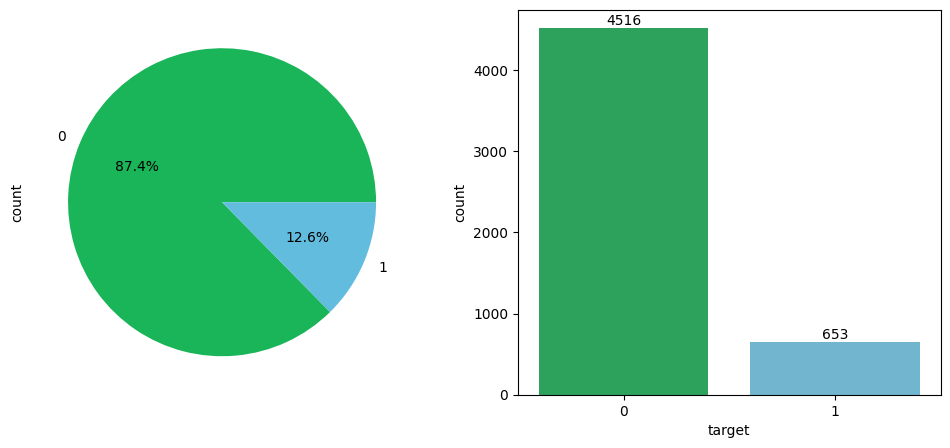

In [20]:
# ploting target column
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

custom_colors = ["#19b558", "#62bcde"]
df["target"].value_counts().plot(kind="pie", autopct="%.1f%%", colors = custom_colors, ax=ax1)
fig = sns.countplot(x=df["target"], palette=custom_colors, ax=ax2)
for bar in fig.containers:
    fig.bar_label(bar)

plt.show()

In [21]:
# number of characters
df["num_characters"] = df["text"].apply(len)

C:\Users\Yash\AppData\Local\Temp\ipykernel_11660\1078094998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df["text"].apply(len)


In [27]:
!pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/1d/af/4bd17254cdda1d8092460ee5561f013c4ca9c33ecf1aab81b44280327cab/regex-2023.12.25-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 131.3 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 203.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.4 MB/


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
df = df.copy()
df["target"] = df['target'].map({"ham": 0, "spam": 1})


In [31]:
df.loc[:, "target"] = df['target'].map({"ham": 0, "spam": 1})


In [33]:
# number of words
import nltk
nltk.download('punkt')
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [34]:
#numnber of sentences
df["num_sen"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [36]:
print(df)

      target                                               text  \
0        NaN  Go until jurong point, crazy.. Available only ...   
1        NaN                      Ok lar... Joking wif u oni...   
2        NaN  Free entry in 2 a wkly comp to win FA Cup fina...   
3        NaN  U dun say so early hor... U c already then say...   
4        NaN  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567     NaN  This is the 2nd time we have tried 2 contact u...   
5568     NaN              Will Ì_ b going to esplanade fr home?   
5569     NaN  Pity, * was in mood for that. So...any other s...   
5570     NaN  The guy did some bitching but I acted like i'd...   
5571     NaN                         Rofl. Its true to its name   

      num_characters  num_words  num_sen  
0                111         24        2  
1                 29          8        2  
2                155         37        2  
3                 49   

In [38]:
df[["num_characters","num_words","num_sen"]].describe()

,num_characters,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000
